C:\Users\T. AKHILA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


17464789/17464789 [==============================] - 5s 0us/step
Epoch 1/5
157/157 [==============================] - 84s 517ms/step - loss: 0.6738 - accuracy: 0.5671 - val_loss: 0.6549 - val_accuracy: 0.5842
Epoch 2/5
157/157 [==============================] - 79s 503ms/step - loss: 0.5359 - accuracy: 0.7302 - val_loss: 0.5845 - val_accuracy: 0.6864
Epoch 3/5
157/157 [==============================] - 79s 505ms/step - loss: 0.4790 - accuracy: 0.7772 - val_loss: 0.5881 - val_accuracy: 0.6954
Epoch 4/5
157/157 [==============================] - 82s 525ms/step - loss: 0.4978 - accuracy: 0.7574 - val_loss: 0.5823 - val_accuracy: 0.6852
Epoch 5/5
196/196 [==============================] - 33s 168ms/step - loss: 0.5144 - accuracy: 0.7516
Epoch 1/5
157/157 [==============================] - 231s 1s/step - loss: 0.5876 - accuracy: 0.6934 - val_loss: 0.3884 - val_accuracy: 0.8224
Epoch 2/5
157/157 [==============================] - 226s 1s/step - loss: 0.3200 - accuracy: 0.8643 - val_loss: 0.3

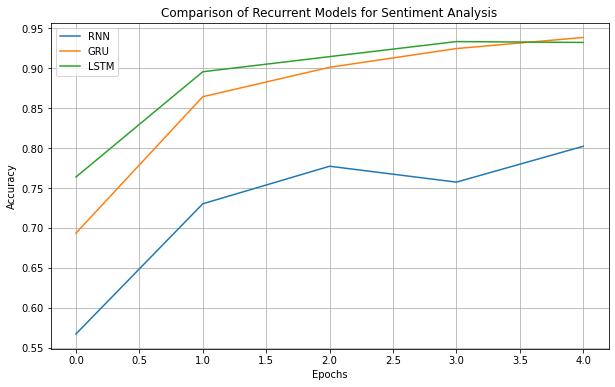

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

# Set the maximum number of words to consider in the reviews
max_words = 5000

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad the sequences to have the same length
max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

# Lists to store accuracy for each model
accuracies = []

# Models to compare
model_names = ["RNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        SimpleRNN(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        GRU(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])
]

# Compile and train models
batch_size = 128
epochs = 5

# Lists to store history for each model
histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(accuracy)

# Create a line plot for accuracy over epochs
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()
02555555

+